<a href="https://colab.research.google.com/github/antonellafontanetto/DataScience/blob/main/Notebook_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programa Ingenias+ Data Science

## ✏️ Ejercitación: Aprendizaje No Supervisado

Esta notebook les permitiria ejercitar los conceptos de aprendizaje automatico no supervisado que hemos aprendimos.

En este caso, vamos a trabajar con el dataset que usamos anteriormente relativos a [clientes de un centro comercial](https://www.kaggle.com/akram24/mall-customers) y que luego de procesar, guardamos oportunamente.

El objetivo de este projecto es ajustar modelos de aprendizaje no supervisado. Luego, realicen la evaluación de los modelos y decidan porque elegirian uno sobre el otro.

### 🚀 👩🏽‍💻 Aprendizaje No Supervisado 📣

## Clustering: Kmeans 🧩

Si aún no lo hicieron, pueden realizar una exploración de los datos para poder visualizar la distribución de las variables y la correlación entre ellas.

Esto es porque para poder aplicar K-means, los datos deben cumplir ciertos requerimientos:

- **Forma de los clusters**: La varianza de la distribución es esferica. Lo que significa que los clusters tienen una forma esferica. Lo que significa que si las variables tienen varianzas similares y siguen una distribución normal, es más factible que este supuesto se cumpla.
- **Tamaño de los clusters**: Todos los clusters deben tener el mismo numero (o muy similar) de observaciones
- **Relación entre las variables**: Existe poca o ninguna correlación entre las variables.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
x1=df['Annual Income (k$)']
x2=df['Spending Score (1-100)']


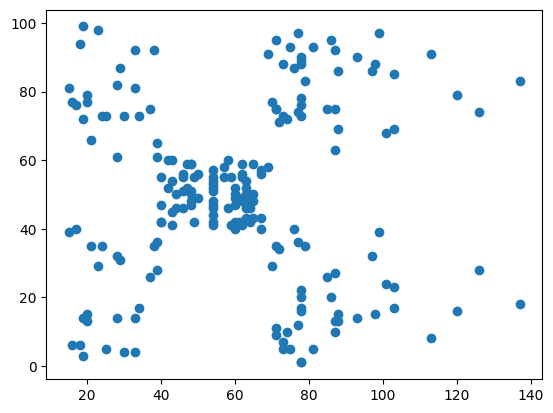

In [ ]:
plt.scatter(x1,x2)

#### Crea tres modelos usando k=2, k=6, k=9

In [ ]:
data=pd.DataFrame({'x1':x1,'x2':x2})

In [ ]:
first_kmeans = KMeans(n_clusters=2, random_state=0)
sec_kmeans = KMeans(n_clusters=6, random_state=0)
thr_kmeans = KMeans(n_clusters=9, random_state=0)

In [ ]:
first_kmeans.fit(data)

KMeans(n_clusters=2, random_state=0)

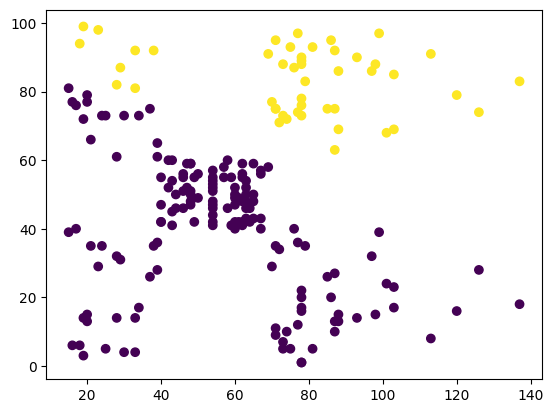

In [ ]:
plt.scatter(data['x1'],data['x2'],c=first_kmeans.labels_)

In [ ]:
sec_kmeans.fit(data)

KMeans(n_clusters=6, random_state=0)

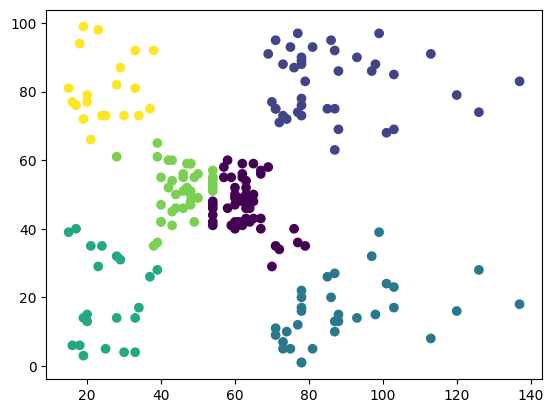

In [ ]:
plt.scatter(data['x1'],data['x2'],c=sec_kmeans.labels_)

In [ ]:
thr_kmeans.fit(data)

KMeans(n_clusters=9, random_state=0)

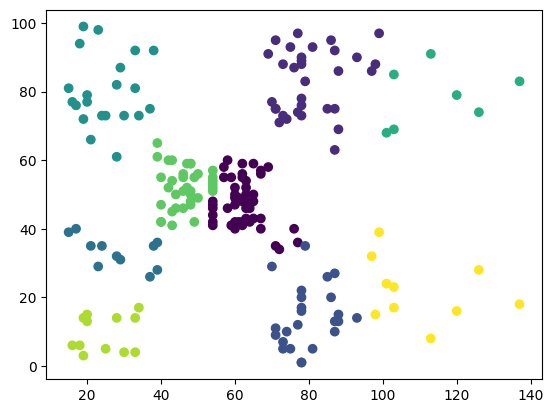

In [ ]:
plt.scatter(data['x1'],data['x2'],c=thr_kmeans.labels_)

In [ ]:
data.head()

,x1,x2
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
first_centroids=first_kmeans.cluster_centers_
sec_centroids=sec_kmeans.cluster_centers_
thr_centroids=thr_kmeans.cluster_centers_

In [ ]:
etiquetas_1 = first_kmeans.labels_
etiquetas_2 = sec_kmeans.labels_
etiquetas_3 = thr_kmeans.labels_

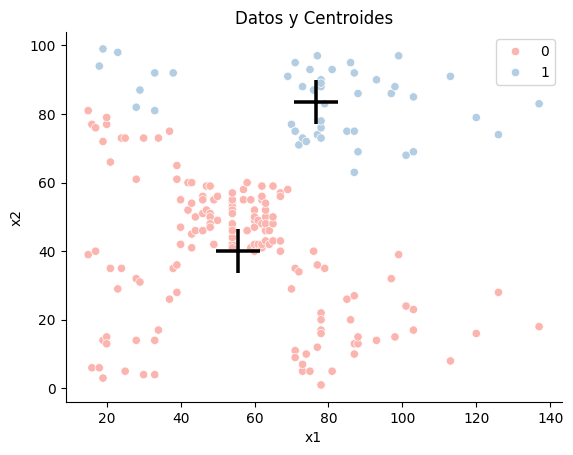

In [ ]:
sns.scatterplot(x=data['x1'], y=data['x2'], hue= etiquetas_1, palette='Pastel1')
sns.scatterplot(x=first_centroids[:, 0], y=first_centroids[:, 1], color='black', marker="+", s=1000)
plt.title('Datos y Centroides')
sns.despine()
plt.show()

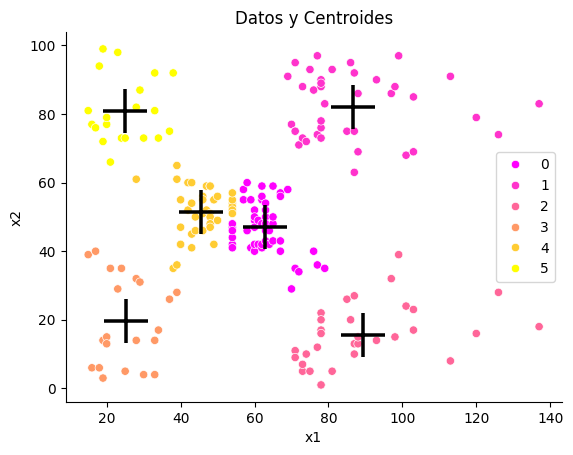

In [ ]:
sns.scatterplot(x=data['x1'], y=data['x2'], hue= etiquetas_2, palette='spring')
sns.scatterplot(x=sec_centroids[:, 0], y=sec_centroids[:, 1], color='black', marker="+", s=1000)
plt.title('Datos y Centroides')
sns.despine()
plt.show()

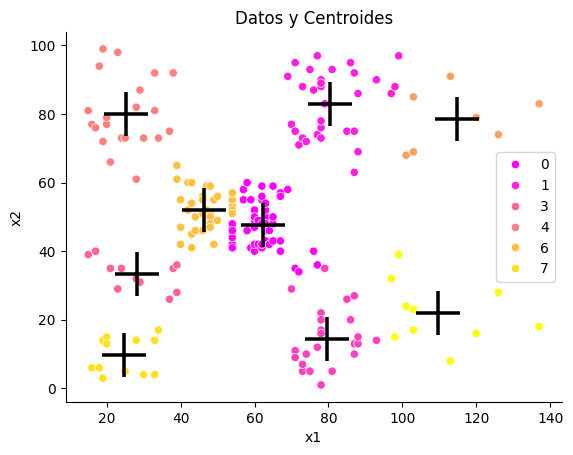

In [ ]:
sns.scatterplot(x=data['x1'], y=data['x2'], hue= etiquetas_3, palette='spring')
sns.scatterplot(x=thr_centroids[:, 0], y=thr_centroids[:, 1], color='black', marker="+", s=1000)
plt.title('Datos y Centroides')
sns.despine()
plt.show()

¿Crees que el resultado es satisfactorio?

Resultado elegido

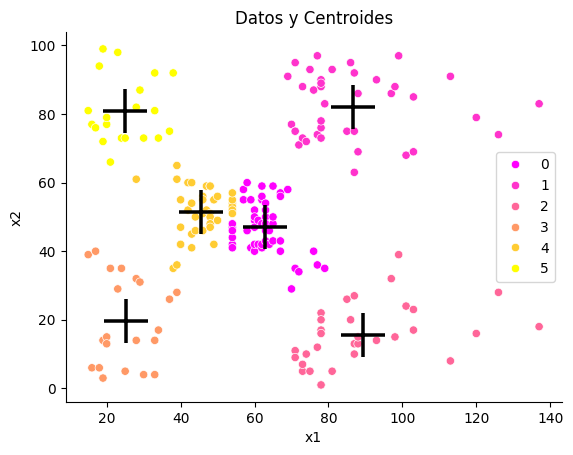

In [ ]:
sns.scatterplot(x=data['x1'], y=data['x2'], hue= etiquetas_2, palette='spring')
sns.scatterplot(x=sec_centroids[:, 0], y=sec_centroids[:, 1], color='black', marker="+", s=1000)
plt.title('Datos y Centroides')
sns.despine()
plt.show()

#### Metodos para elegir K

Aplica los métodos que conoces y elige el k que mejor se ajusta a los datos.

**Metodo Silhouette**

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(data)
    labels = kmeans.labels_
    sil.append(silhouette_score(data, labels, metric='euclidean'))

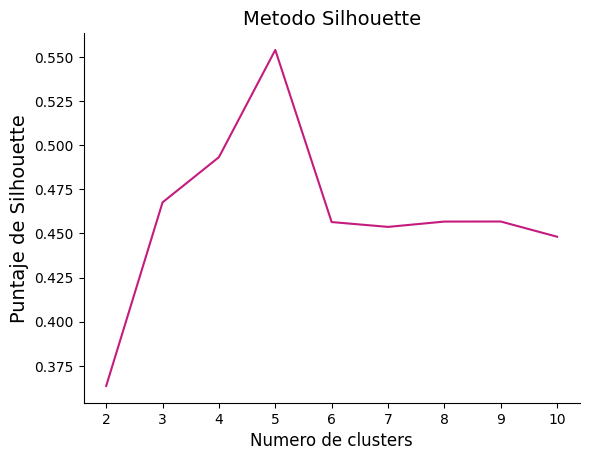

In [ ]:
plt.plot(range(2,11),sil, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Silhouette', size=14)
plt.xlabel('Numero de clusters', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)
plt.show()

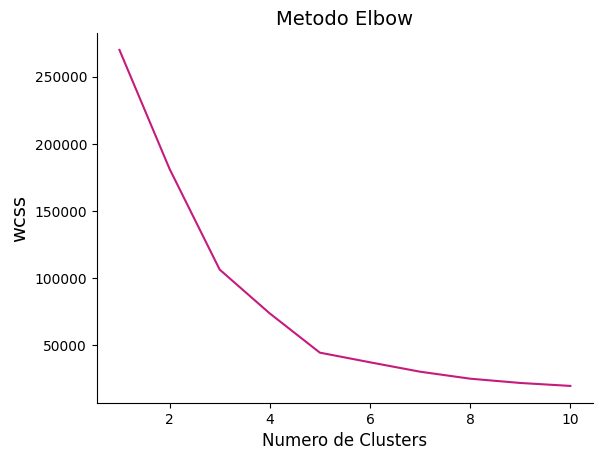

In [ ]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(data)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Elbow', size=14)
plt.xlabel('Numero de Clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

#### Ajusta el modelo usando el K seleccionado

In [ ]:
nuevo_k = KMeans(n_clusters=5, random_state=0)

In [ ]:
nuevo_k.fit(data)

KMeans(n_clusters=5, random_state=0)

In [ ]:
centroide = nuevo_k.cluster_centers_

In [ ]:
etiquetas_nueva = nuevo_k.labels_

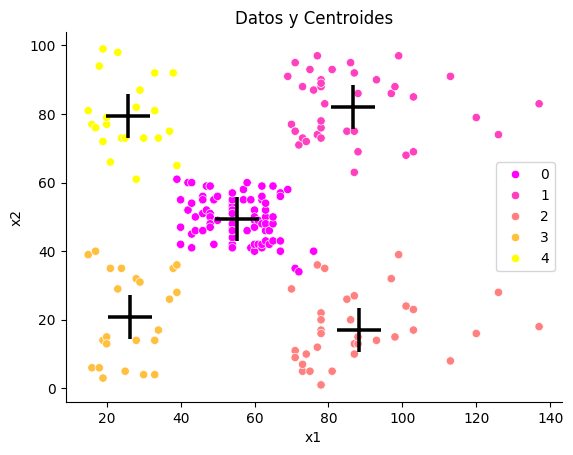

In [ ]:
sns.scatterplot(x=data['x1'], y=data['x2'], hue= etiquetas_nueva, palette='spring')
sns.scatterplot(x=centroide[:, 0], y=centroide[:, 1], color='black', marker="+", s=1000)
plt.title('Datos y Centroides')
sns.despine()
plt.show()

### Reducción de la dimensionalidad

Prueba ahora reduciendo la dimensionalidad y ajustando K-means nuevamente.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Transformo los features
pca = PCA(n_components=4)
X_pca = pca.fit_transform(data)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])
df_merged = pd.merge(df, pca_df, right_index=True, left_index=True)

## Clustering: DBSCAN 🧩

¿Y si comparamos con ajustar un modelo de DBSCAN?

¿Qué opinan? ¿Qué modelo arrojo mejores resultados de clustering?